
<span style="color: yellow; font-weight: bold; font-size: 350%;">Heart Disease Predictions</span>\

<span style="color: yellow; font-weight: bold; font-size: 250%;">Complete Project</span>

![Heart Disease Image](https://i.ibb.co/3rjKL1g/heart-diease.jpg)

**Author Name**: Adnan Hyder 👨‍💻

Let's get connected to learn and bring the positive change in the Data Science world.\

[![Github](https://img.shields.io/badge/Github-CoderHyder17-blue?style=flat-square)](https://github.com/coderhyder17)  
[![Kaggle](https://img.shields.io/badge/Kaggle-AdnanAnalytics-orange?style=flat-square)](https://www.kaggle.com/adnananalytics)  
[![Linkedin](https://img.shields.io/badge/Linkedin-AdnanHyder-0A66C2?style=flat-square)](https://www.linkedin.com/in/adnan-hyder-46b53331a/)

Date: 26 Feb, 2025\
Dataset: [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

---
## **About Dataset / Meta Data**
---
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.


## **Content**

### Column Descriptions:
* 'id' (Unique id for each patient)
* 'age' (Age of the patient in years)
* 'origin' (place of study)
* 'sex' (Male/Female)
* 'cp' chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* 'trestbps' resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* 'chol' (serum cholesterol in mg/dl)
* 'fbs' (if fasting blood sugar > 120 mg/dl)
* 'restecg' (resting electrocardiographic results)
  -- Values [normal, stt abnormality, lv hypertrophy]
* 'thalch' maximum heart rate achieved
* 'exang' exercise-induced angina (True/ False)
* 'oldpeak' ST depression induced by exercise relative to rest
* 'slope' the slope of the peak exercise ST segment
* 'ca' number of major vessels (0-3) colored by fluoroscopy
* 'thal' [normal; fixed defect; reversible defect]
* 'num' the predicted attribute


## **Acknowledgements**

### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# **Aims and Objectives**

1. We will explore the dataset and try to understand the data.

---

<span style="color: yellow; font-weight: bold; font-size: 200%;">Importing Libraries & Dataset</span>

---

We will import the following libraries to get started

In [226]:
# for data handling
import pandas as pd
import numpy as np

# for Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
import optuna
from optuna.samplers import TPESampler

# metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [227]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---
<span style="color: yellow; font-weight: bold; font-size: 200%;">Exploratory Data Analysis (EDA)</span>

---

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


* There are 920 rows and 16 columns in the dataset.\
* There are 8 numeric column and 8 categorical columns in the dataset.\
* Some missing values are Present in trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, and thal.

In [229]:
df.shape

(920, 16)

In [230]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


* The minimum age of an Heart Disease patient is 28 years and the maximum age is 77 years. The average age of a Heart Disease patient is 54 years.
* The minimum resting blood pressure is 0 Hg and maximum is 200 mm Hg and the average resting blood pressure is 132 mm Hg.\
  **Normal blood pressure: Below 120/80 mmHg** 
* The minimum serum cholesterol is 0 mg/dl and maximum is 603 mg/dl. The average serum cholesterol is 199 mg/dl.\
  **Normal range of serum cholesterol (chol) is less than 200 mg/dL**
* The minimum maximum heart rate achieved is 71 and maximum is 202. The average maximum heart rate achieved is 137.
  Expected Normal Range by Age:
    * 20 years old → ~200 bpm
    * 30 years old → ~190 bpm
    * 40 years old → ~180 bpm
    * 50 years old → ~170 bpm
    * 60 years old → ~160 bpm
    * 70 years old → ~150 bpm

#### Let's see the age column first

In [231]:
# Minimum and maximum age
df['age'].min(), df['age'].max()

(28, 77)

In [232]:
# print the number of patiens whose age is greater than 50
df[df['age'] > 50].shape

(603, 16)

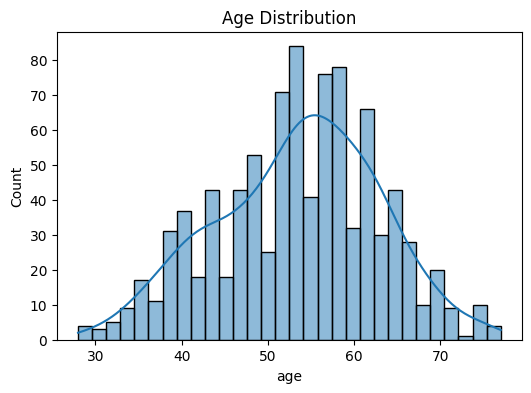

In [233]:
# drwa a histplot of age column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Maximum Heart Disease patients are between 40 to 65 years old.

Mean: 53.51086956521739
Median: 54.0
Mode: 54


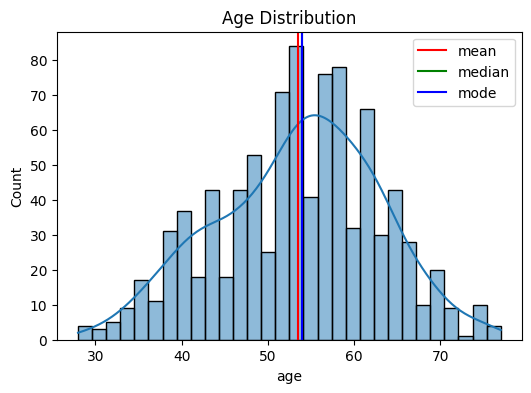

In [234]:
# plot the mean, median and mode of age column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='blue', label='mode')
plt.title('Age Distribution')
plt.legend()

# print the mean, median and mode of the age columns
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's expore the gender based distribution of age column

In [235]:
# histogram of age column using plotly on the basis of gender
fig = px.histogram(df, x='age', color='sex', title='Age Distribution')
fig.show()

In [236]:
# values of sex columns
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [237]:
# value counts of sex column grouped by age
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [238]:
# count the percentage of male and female
male_count = 726
female_count = 194
total_count = 920

# percentage
male_percentage = (726 / 920) * 100
female_percentage = (194 / 920) * 100

print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female percentage in the data: {female_percentage:.2f}%")

Male percentage in the data: 78.91%
Female percentage in the data: 21.09%


In [239]:
# how many percent the males are more than females

# difference
difference = (male_percentage - female_percentage) / female_percentage * 100
print(f"The males are {difference:.2f}% more than females in the dataset")

The males are 274.23% more than females in the dataset


According to this data the males are more prone to heart disease than females.

#### Age Column

In [240]:
# age distribution of the dataset using plotly
fig = px.histogram(df, x='age', color='dataset', title='Age Distribution of Dataset')
fig.show()

#### Let's deal with Dataset column

In [241]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [242]:
# total patients in the dataset group by sex
value_count = df.groupby('dataset')['sex'].value_counts()
print(value_count)

# bar plot of it 
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='dataset', hue='sex')
# plt.title('Dataset Distribution')
# plt.show()

# bar plot  plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64


In [243]:
# the mean, median and mode of the age column grouped by dataset column
print(f"Mean of the dataset: {df.groupby('dataset')['age'].mean()}")
print('-----------------------------------')
print(f"Median of the dataset: {df.groupby('dataset')['age'].median()}")
print('-----------------------------------')
print(f"Mode of the dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of the dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------------
Median of the dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------------
Mode of the dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Let's explore cp (chest pain) column

In [244]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [245]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age', color='cp', title='Age Distribution of Dataset')
fig.show()

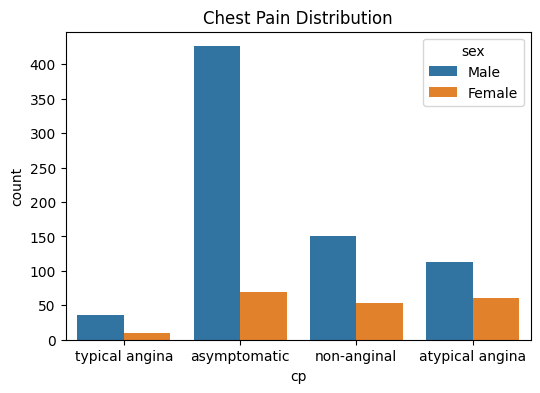

In [246]:
# count plot of cp column grouped by sex column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='sex')
plt.title('Chest Pain Distribution')
plt.show()

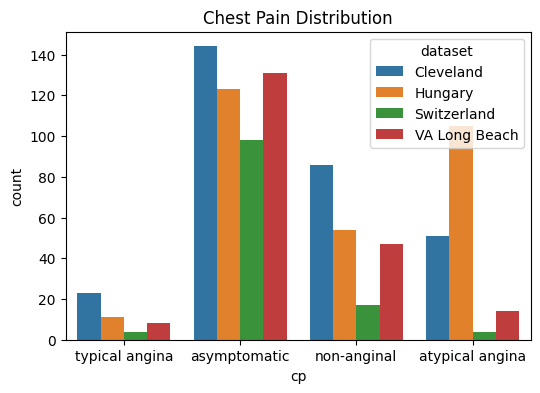

In [247]:
# count plot of cp column grouped by dataset column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='dataset')
plt.title('Chest Pain Distribution')
plt.show()

In [248]:
# at what age the chest pain is more common
df.groupby('cp')['age'].mean()

cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64

#### Let's explore the trestbps column

The normal resting blood pressure is 120/80 mmHg.

- If the resting blood pressure is less than 120/80 mmHg then it is considered as low blood pressure. it can reduce the amount of blood flow to your brain, which can cause dizziness, lightheadedness, or even fainting. In severe cases, low blood pressure can be life-threatening.

- If the resting blood pressure is more than 120/80 mmHg then it is considered as high blood pressure. High blood pressure can cause hardening and thickening of the arteries (atherosclerosis), which can lead to a heart attack, stroke or other complications.

In [249]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

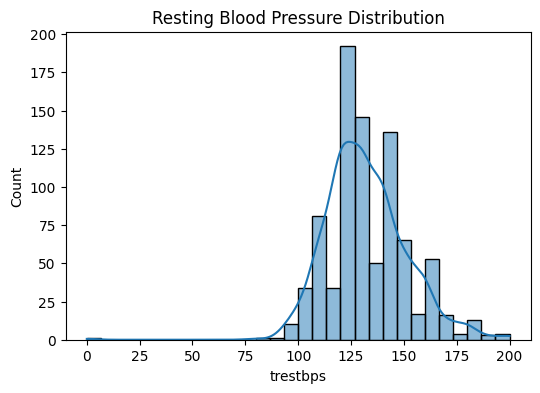

In [250]:
# create a histplot of trestbps column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='trestbps', bins=30, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

- According to this dataset, the resting blood pressure of is distributed within the rang of 100 to 200. The mean resting blood pressure is 132.13 mmHg, and the minimum 0 and the maximum is 200.\
- Normal blood pressure reading is 120/80 mm Hg or lower. Values above this might indicate elevated blood pressure (prehypertension) or hypertension, while values lower than 90/60 mm Hg might indicate hypotension.

In [251]:
df['trestbps'].value_counts().sum()

861

In [252]:
df['trestbps'].isnull().sum()

59

It means there are 59 missing values in the trestbps column.

In [253]:
print(f"Percentage of missing values in the trestbps column is {(df['trestbps'].isnull().sum() / len(df)) * 100:.2f}%")

Percentage of missing values in the trestbps column is 6.41%


In [254]:
# impiute missing values in the trestbps column using IterativeImputer
imputer = IterativeImputer()
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

# print the missing values in the trestbps column
print("Missing values in trestbps column:", df['trestbps'].isnull().sum())

Missing values in trestbps column: 0


In [255]:
# Let's impute other columns missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [257]:
# impute the missing values of numeric columns in the dataset using IterativeImputer and save for inverse transform
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])

In [258]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

#### Let's explore the thal column

In [259]:
df['thal'].value_counts().sum()

434

In [260]:
missing_perc = (df['thal'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in the thal column is {missing_perc:.2f}%")

Percentage of missing values in the thal column is 52.83%


---
<span style="color: yellow; font-weight: bold; font-size: 250%;">Handling Null values in the Dataset</span>

---

Now it's being necessary to impute the missing values of the dataset as there were no missing values in the first 5 columns

In [261]:
df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
thalch        0
oldpeak       0
ca            0
num           0
dtype: int64

In [262]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [263]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [264]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# `Step 1:` Separate rows with missing and non-missing values for the target column
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    # `Step 2:` Extract features (X) and target variable (y) for non-missing values
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # `Step 3:` Extract other missing columns for later imputation
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # `Step 4:` Encode categorical columns using LabelEncoder
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    # `Step 5:` Encode the target column if it is a boolean type
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y.astype(str))

    # `Step 6:` Initialize IterativeImputer with RandomForestRegressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # `Step 7:` Impute other missing columns in the dataset
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # `Step 8:` Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # `Step 9:` Train a RandomForestClassifier to predict missing values in the target column
    rf_classifier = RandomForestClassifier()

    # `Step 10:` Predict missing values and calculate accuracy
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    # `Step 11:` Prepare the dataset with missing values for the final imputation
    X = df_null.drop(passed_col, axis=1)

    # `Step 12:` Impute missing values in the target column for the original missing data
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # `Step 13:` Combine the imputed data with the original dataset
    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

# function to impute missing values in continuous columns
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    # `Step 2:` Extract features (X) and target variable (y) for non-missing values
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # `Step 3:` Extract other missing columns for later imputation
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # `Step 4:` Encode categorical columns using LabelEncoder
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    # `Step 5:` Initialize IterativeImputer with RandomForestRegressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # `Step 6:` Impute other missing columns in the dataset
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # `Step 7:` Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # `Step 8:` Train a RandomForestRegressor to predict missing values in the target column
    rf_regressor = RandomForestRegressor()

    # `Step 9:` Predict missing values and calculate accuracy
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    # `Step 10:` dealing missing values of object / category column
    X = df_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    # `Step 11:` Impute missing values in the target column for the original missing data
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

 # `Step 12:` Combine the imputed data with the original dataset
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

# Impute missing values for all categorical columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = impute_categorical_missing_data(col)

The feature 'fbs' has been imputed with 79.52 accuracy

The feature 'restecg' has been imputed with 64.13 accuracy

The feature 'exang' has been imputed with 77.46 accuracy

The feature 'slope' has been imputed with 67.48 accuracy

The feature 'thal' has been imputed with 73.56 accuracy



In [266]:
# check for null values
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [267]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 78.8 accuracy

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 59.78 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 80.98 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 79.35 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 84.78 accuracy



In [268]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

---
<span style="color: yellow; font-weight: bold; font-size: 250%;">Dealing Outliers</span>

---

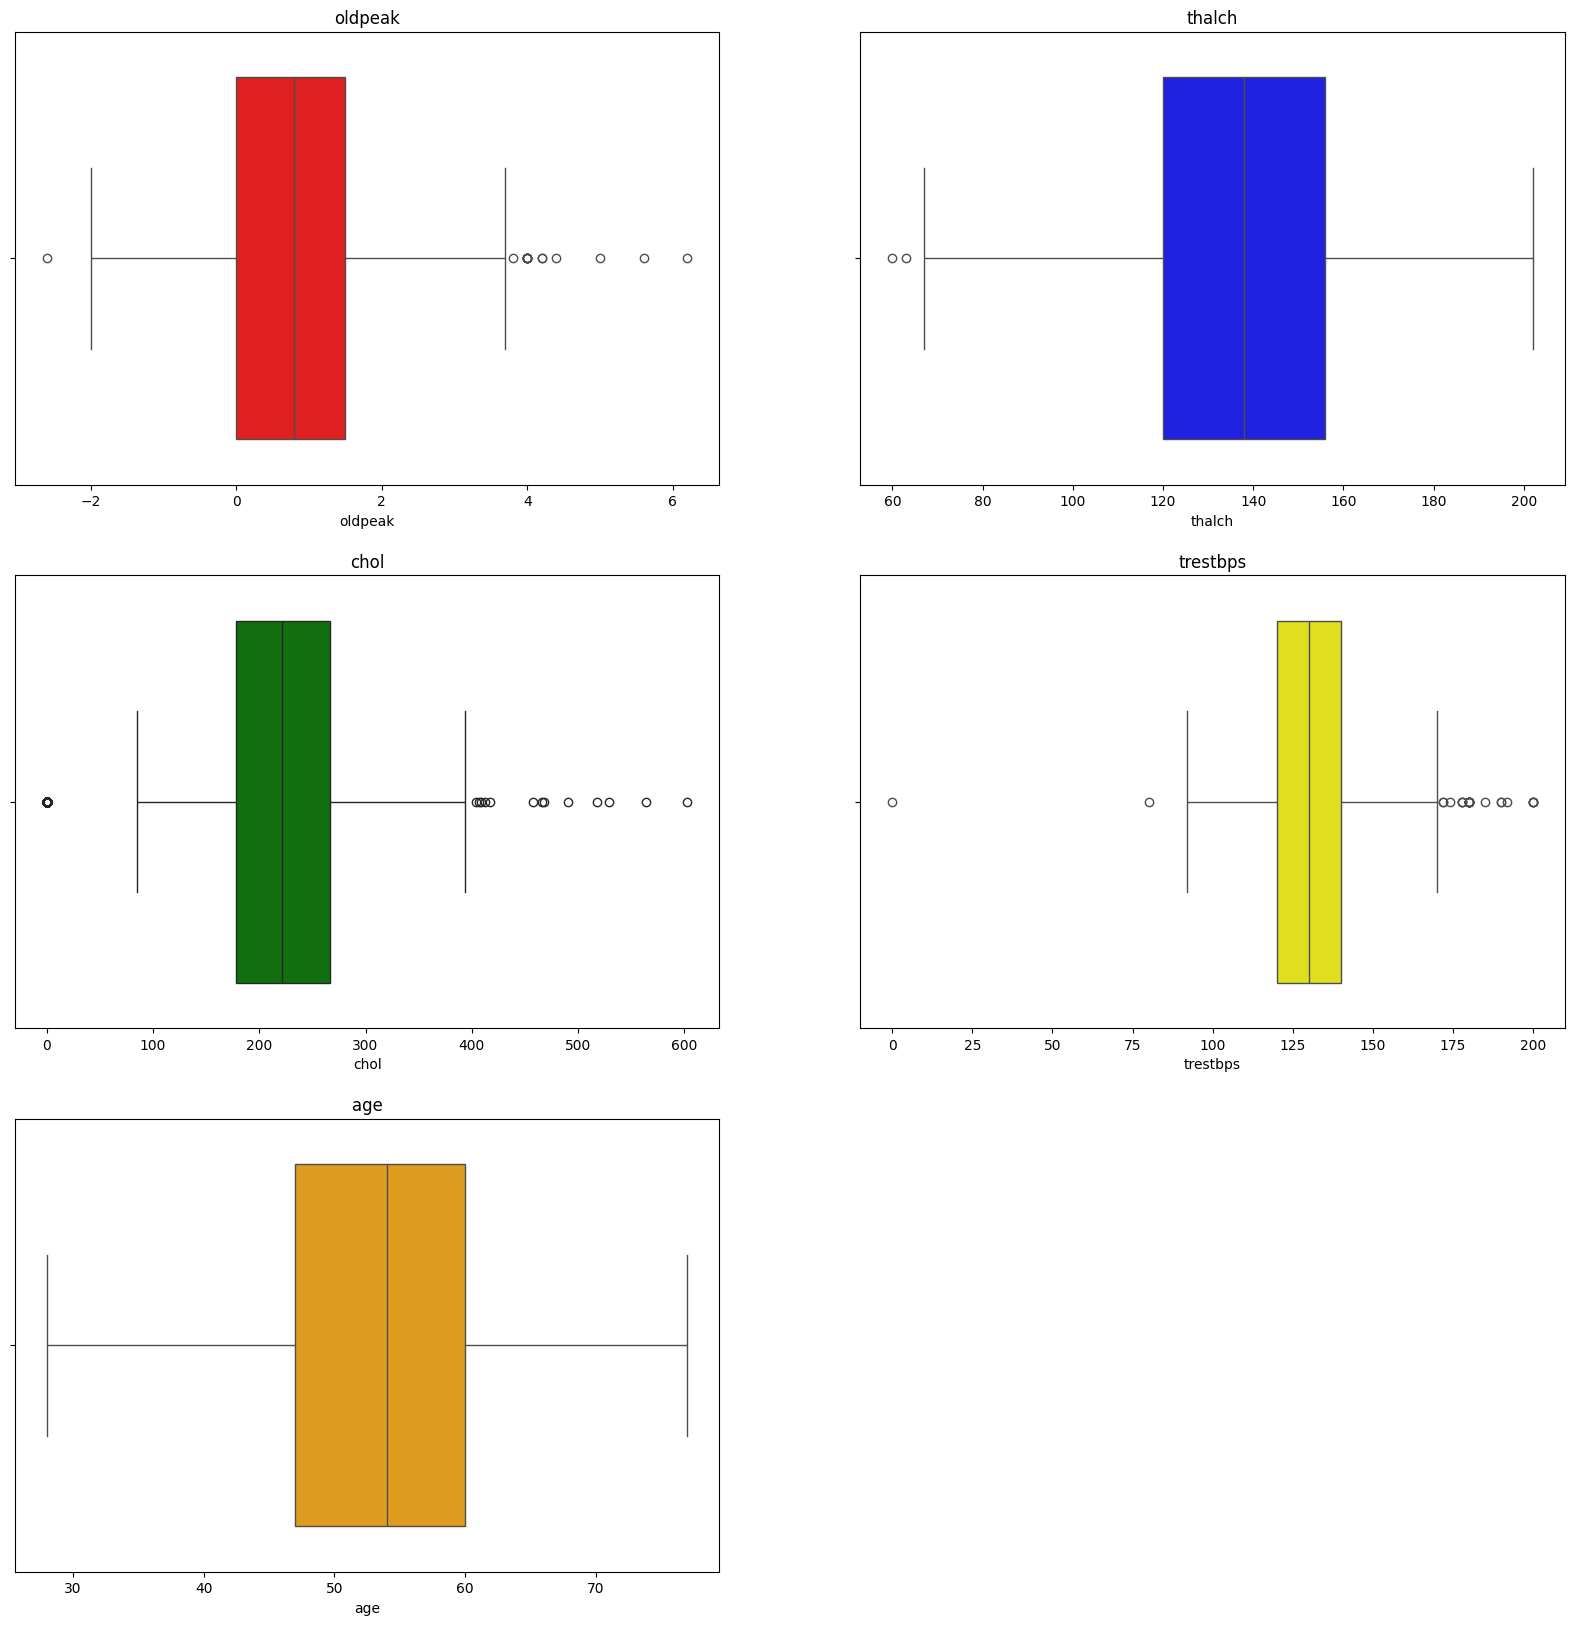

In [269]:
# create a box plot of all numeric columns using for loop or subplot

plt.figure(figsize=(20,20))

colors = ['red', 'blue', 'green', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [270]:
fig = px.box(data_frame = df, y = 'age')
fig.show()

fig = px.box(data_frame = df, y = 'trestbps')
fig.show()

fig = px.box(data_frame = df, y = 'chol')
fig.show()

fig = px.box(data_frame = df, y = 'age')
fig.show()

fig = px.box(data_frame = df, y = 'thalch')
fig.show()

fig = px.box(data_frame = df, y = 'oldpeak')
fig.show()

In [271]:
# print the rows of trestbps column which is equal to 0
df[df['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [272]:
# print the rows of chol column which is equal to 0
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.676375,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.676375,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.878788,flat,0.676375,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.676375,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.676375,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.676375,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.676375,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.676375,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,137.545665,True,0.878788,flat,0.676375,reversable defect,1


In [273]:
# print the rows of oldpeak column which is equal to -2.6
df[df['oldpeak'] == -2.6]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
615,616,46,Male,Switzerland,asymptomatic,100.0,0.0,False,st-t abnormality,133.0,False,-2.6,flat,0.676375,reversable defect,1


In [274]:
# print the rows of thalch column which is equal to 60 and 63
print(df[df['thalch'] == 60])

      id  age   sex      dataset            cp  trestbps  chol    fbs restecg  \
631  632   51  Male  Switzerland  asymptomatic     140.0   0.0  False  normal   

     thalch  exang  oldpeak slope        ca    thal  num  
631    60.0  False      0.0  flat  0.676375  normal    2  


In [275]:
print(df[df['thalch'] == 63])

      id  age   sex      dataset            cp  trestbps  chol    fbs restecg  \
677  678   60  Male  Switzerland  asymptomatic     135.0   0.0  False  normal   

     thalch exang  oldpeak      slope        ca               thal  num  
677    63.0  True      0.5  upsloping  0.676375  reversable defect    3  


In [276]:
# remove that row
df = df[df['trestbps'] != 0]

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


#### Chol column

In [278]:
df['chol'].unique()

array([233.        , 286.        , 229.        , 250.        ,
       204.        , 236.        , 268.        , 354.        ,
       254.        , 203.        , 192.        , 294.        ,
       256.        , 263.        , 199.        , 168.        ,
       239.        , 275.        , 266.        , 211.        ,
       283.        , 284.        , 224.        , 206.        ,
       219.        , 340.        , 226.        , 247.        ,
       167.        , 230.        , 335.        , 234.        ,
       177.        , 276.        , 353.        , 243.        ,
       225.        , 302.        , 212.        , 330.        ,
       175.        , 417.        , 197.        , 198.        ,
       290.        , 253.        , 172.        , 273.        ,
       213.        , 305.        , 216.        , 304.        ,
       188.        , 282.        , 185.        , 232.        ,
       326.        , 231.        , 269.        , 267.        ,
       248.        , 360.        , 258.        , 308.  

In [279]:
df['chol'].min(), df['chol'].max()

(0.0, 603.0)

The range of cholestrol level is as under:-
* ✅ Normal: < 200 mg/dL
* ⚠️ Borderline High: 200–239 mg/dL
* ❌ High: ≥ 240 mg/dL

Let's see how many heart patients have Normal cholestrol level and how many heart patients have higher cholestrol level.

In [280]:
normal_chol = df[df['chol'] < 200].value_counts().sum()
borderline_high_chol = df[(df['chol'] >= 200) & (df['chol'] < 240)].value_counts().sum()
high_chol = df[df['chol'] >= 240].shape[0]  # ✅ Returns an integer count

In [281]:
borderline_high_chol = int(borderline_high_chol)
high_chol = int(high_chol)

In [282]:

print(f"A Total of {normal_chol} have normal cholesterol levels")
print(f"A Total of {borderline_high_chol} have borderline high cholesterol levels")
print(f"A Total of {high_chol} have high cholesterol levels")

A Total of 329 have normal cholesterol levels
A Total of 231 have borderline high cholesterol levels
A Total of 359 have high cholesterol levels


#### It means a Total of 590 have higher than normal cholesterol levels

In [283]:
# which sex has more high cholestrol level than the other?
df[df['chol'] >= 200]['sex'].value_counts()

sex
Male      444
Female    146
Name: count, dtype: int64

In [284]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [285]:
# count the number of male and female patients in sex column
male_count = df[df['sex'] == 'Male'].shape[0]
female_count = df[df['sex'] == 'Female'].shape[0]
print(male_count)
print(female_count)

725
194


A total of 444 out of 725 Male and 146 out of 194 female heart patients have more than normal cholestrol level.

In [286]:
male_per = (444 / 725) * 100
male_per

61.241379310344826

In [287]:
female_per = (146 / 194) * 100
female_per

75.25773195876289

In [288]:
# check that how many high cholestrol heart patients belong to which of the dataset values
df[df['chol'] >= 200]['dataset'].value_counts()

dataset
Cleveland        254
Hungary          218
VA Long Beach    118
Name: count, dtype: int64

In [289]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    199
Switzerland      123
Name: count, dtype: int64

- 83.5% of the heart disease patients from Cleveland have higher than normal cholestrol level.
- 74.4% of the heart disease patients from Hungary have higher than normal cholestrol level.
- 59.2% of the heart disease patients from Switzerland have higher than normal cholestrol level.

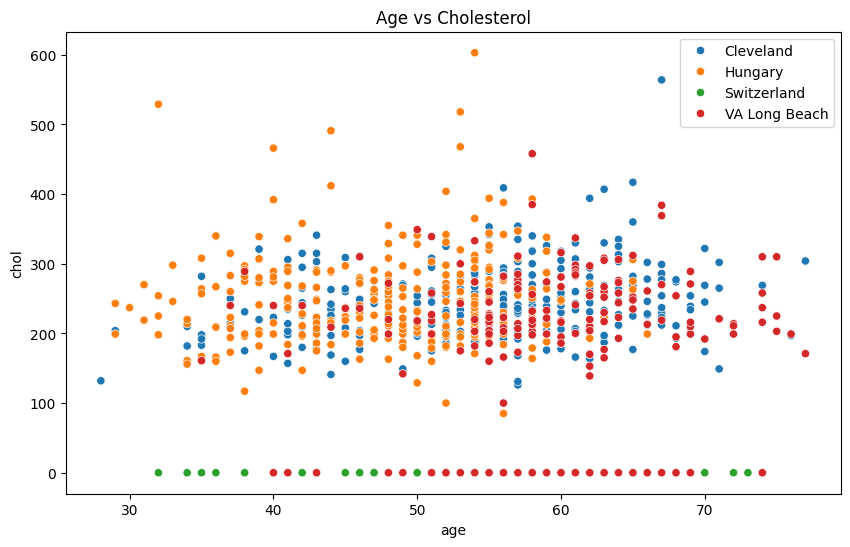

In [290]:
# make a suitable plot of age and chol columns to see if there is any relationship between them
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='dataset')
# keep the legend outside the plot
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Age vs Cholesterol')
plt.show()

It seems like there is no any specific relationship between age and chol.

#### fbs (Fasting Blood Sugar)

The normal range of fasting blood sugar is 70-100 mg/dL. The borderline range is 100-125 mg/dL. Fasting blood sugar levels of 126 mg/dL or higher indicate diabetes. In this column, if the fasting blood sugar is greater than 120 mg/dL then it is considered as high blood sugar.

In [291]:
# check the value counts of fbs column
df['fbs'].value_counts()

fbs
False    781
True     138
Name: count, dtype: int64

A total of 138 out of 919 heart disease patients have high blood sugar. It seems like there is no any specific relationship between age and fbs.

In [292]:
# check which sex is more likely to have fbs
df[df['fbs'] == True][df['sex'] == 'Male'].value_counts().sum(), df[df['fbs'] == True][df['sex'] == 'Female'].value_counts().sum()

(119, 19)

Only 119 out of 725 Male heart disease patients and 19 out of 194 Female heart disease patients have high blood sugar.

#### restecg column

restecg refers to the Resting Electrocardiogram (ECG/EKG) results, which is a test that measures the electrical activity of the heartbeat. The results of the ECG can help the doctor to diagnose heart-related problems. 
This dataset classifies the results into 3 categories:
- Normal:-
  * No significant irregularities in heart rhythm.
  * No signs of ischemia or hypertrophy
- ST-T wave abnormality:-
  * ST segment changes or T-wave inversion, which can indicate:
    * Myocardial ischemia (lack of oxygen to the heart)
    * Past heart attack (myocardial infarction)
- Left Ventricular Hypertrophy 
  * Thickening of the left ventricle, often due to chronic high blood pressure (hypertension) or aortic valve disease.

In [293]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [294]:
df['restecg'].value_counts()

restecg
normal              552
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Most of the heart disease patients have normal restecg.

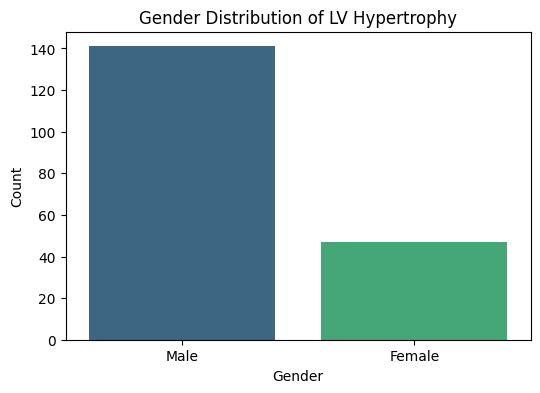

In [295]:
# Count the number of males and females with lv hypertrophy
lv_hypertrophy_counts = df[df['restecg'] == 'lv hypertrophy']['sex'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 4))
sns.barplot(x=lv_hypertrophy_counts.index, y=lv_hypertrophy_counts.values, palette='viridis')
plt.title('Gender Distribution of LV Hypertrophy')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### thalch column

thalch stands for the maximum heart rate achieved. In this dataset, the thalch means the maximum heart rate achieved by the heart patient during the exercise. The normal range of maximum heart rate achieved is 60-100 bpm.

In [296]:
df['thalch'].value_counts()

thalch
137.545665    55
150.000000    43
140.000000    41
120.000000    35
130.000000    30
              ..
195.000000     1
87.000000      1
187.000000     1
192.000000     1
73.000000      1
Name: count, Length: 120, dtype: int64

In [297]:
df['thalch'].min(), df['thalch'].max()

(60.0, 202.0)

In [298]:
df[df['thalch'] > 100].value_counts().sum()

834

It means that the maximum heart patients have achieved the heart rate more than normal. 

In [299]:
# convert 'thal' column to numeric
df['thalch'] = pd.to_numeric(df['thalch'], errors='coerce')

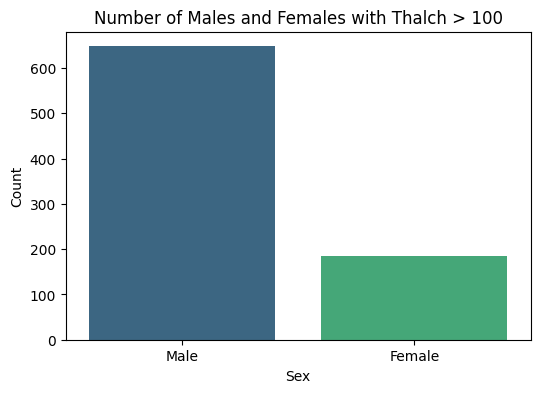

In [300]:
# No of males and females have thalch greater than 100
thalch_counts = df[df['thalch'] > 100]['sex'].value_counts()

# Plotting the counts
plt.figure(figsize=(6, 4))
sns.barplot(x=thalch_counts.index, y=thalch_counts.values, palette='viridis')
plt.title('Number of Males and Females with Thalch > 100')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [301]:
df['sex'].value_counts()

sex
Male      725
Female    194
Name: count, dtype: int64

In [302]:
(186 / 194) * 100

95.87628865979381

* Almost 95% of Female heart disease patients have achieved the maximum heart rate more than normal.
* Similarly, 89% of the Male heart disease patients have achieved the maximum heart rate more than normal. 

In [303]:
# from where are the patients more likely to have thalch greater than 100
df[df['thalch'] > 100]['dataset'].value_counts()

dataset
Cleveland        296
Hungary          268
VA Long Beach    176
Switzerland       94
Name: count, dtype: int64

#### exang column

exang means exercise induced angina is a condition where the heart does not receive enough blood flow and oxygen when the patient is exercising or under stress. It is a symptom of coronary artery disease.

In [304]:
# let's check the value counts
df['exang'].value_counts()

exang
False    548
True     371
Name: count, dtype: int64

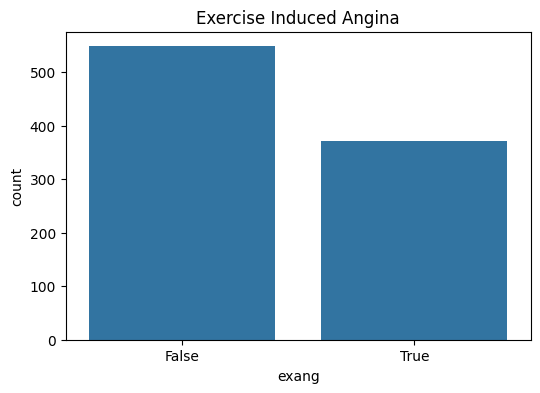

In [305]:
# help me understand exang through plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='exang')
plt.title('Exercise Induced Angina')
plt.show()

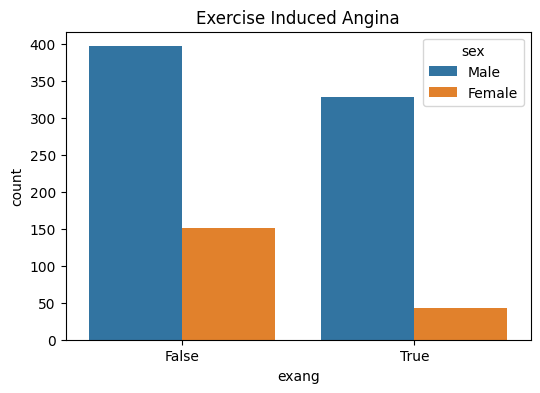

In [306]:
# check the ratio of Males and Females with respect to exang column with the help of plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='exang', hue='sex')
plt.title('Exercise Induced Angina')
plt.show()

In [307]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


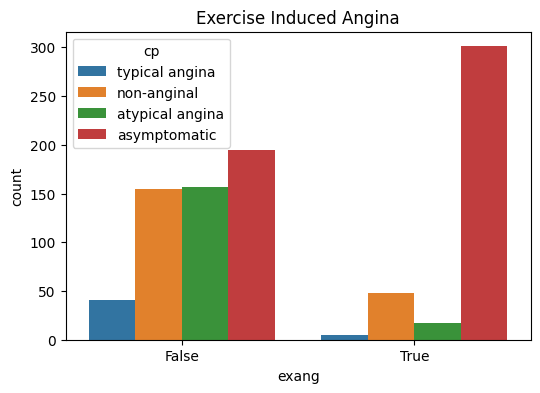

In [308]:
# exang column with respect to cp column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='exang', hue='cp')
plt.title('Exercise Induced Angina')
plt.show()

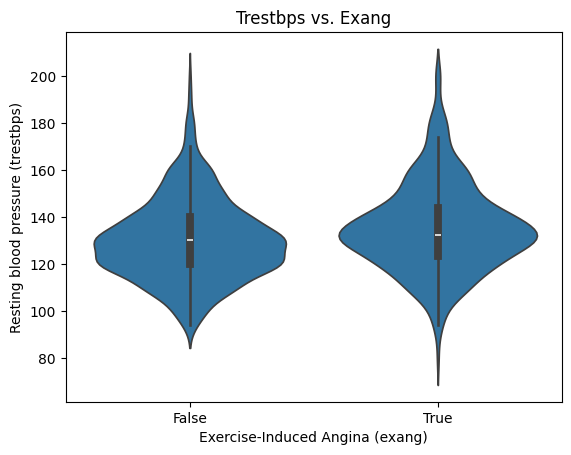

In [309]:
# barplot of exang relationship with trestbps 
sns.violinplot(x=df['exang'], y=df['trestbps'])
plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Resting blood pressure (trestbps)")
plt.title("Trestbps vs. Exang")
plt.show()

In [310]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Oldpeak column

oldpeak measures the ST segment depression in an electrocardiogram (ECG/EKG) that occurs during exercise compared to rest. It indicates how much the ST segment drops below the baseline when a person is under physical stress.
> 0.0	= No ST depression (Normal) \
> 0.1 - 1.0	= Mild ST depression (May be normal or borderline) \
> 1.0	= Significant ST depression (Possible ischemia, higher heart disease risk)


In [311]:
df['oldpeak'].min(), df['oldpeak'].max()

(-2.6, 6.2)

- Typically, oldpeak (ST depression) is non-negative, as it measures how much the ST segment drops below the baseline.
- A negative value like -2.6 would imply ST elevation, which is a different condition, often seen in acute heart attacks (STEMI - ST-Elevation Myocardial Infarction).
- It is unusual to have negative oldpeak values in a dataset measuring ST depression.

In [312]:
df[df['oldpeak'] < 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
603,604,38,Male,Switzerland,non-anginal,100.0,0.0,False,normal,179.0,False,-1.1,upsloping,0.676375,normal,0
609,610,42,Male,Switzerland,asymptomatic,105.0,0.0,False,normal,128.0,True,-1.5,downsloping,0.676375,reversable defect,1
614,615,45,Male,Switzerland,non-anginal,110.0,0.0,False,normal,138.0,False,-0.1,upsloping,0.676375,reversable defect,0
615,616,46,Male,Switzerland,asymptomatic,100.0,0.0,False,st-t abnormality,133.0,False,-2.6,flat,0.676375,reversable defect,1
629,630,51,Male,Switzerland,asymptomatic,130.0,0.0,False,normal,170.0,False,-0.7,upsloping,0.676375,reversable defect,2
653,654,56,Male,Switzerland,non-anginal,125.0,0.0,False,normal,98.0,False,-2.0,flat,0.676375,reversable defect,2
655,656,56,Male,Switzerland,asymptomatic,115.0,0.0,False,st-t abnormality,82.0,False,-1.0,upsloping,0.676375,reversable defect,1
656,657,56,Male,Switzerland,asymptomatic,120.0,0.0,False,st-t abnormality,100.0,True,-1.0,downsloping,0.676375,reversable defect,2
691,692,62,Male,Switzerland,typical angina,120.0,0.0,False,lv hypertrophy,134.0,False,-0.8,flat,2.000000,reversable defect,1
694,695,62,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,72.0,True,-0.5,flat,0.676375,normal,1


In [313]:
# total number of rows where the oldpeak is 0
df[df['oldpeak'] < 0].shape

(12, 16)

In [314]:
# check number of rows with respect of dataset column where the oldpeak is 0
df[df['oldpeak'] < 0]['dataset'].value_counts()

dataset
Switzerland      11
VA Long Beach     1
Name: count, dtype: int64

In [315]:
# drop the rows where oldpeak is 0 with inplace true method
df.drop(df[df['oldpeak'] < 0].index, inplace=True)

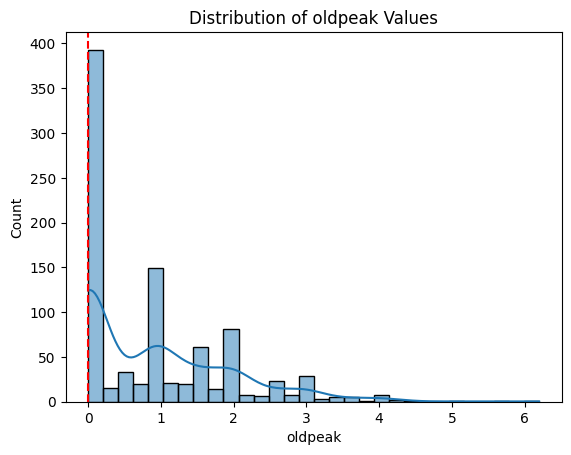

In [316]:
# check the distribution of the data
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')  # Mark zero on the plot
plt.title("Distribution of oldpeak Values")
plt.show()

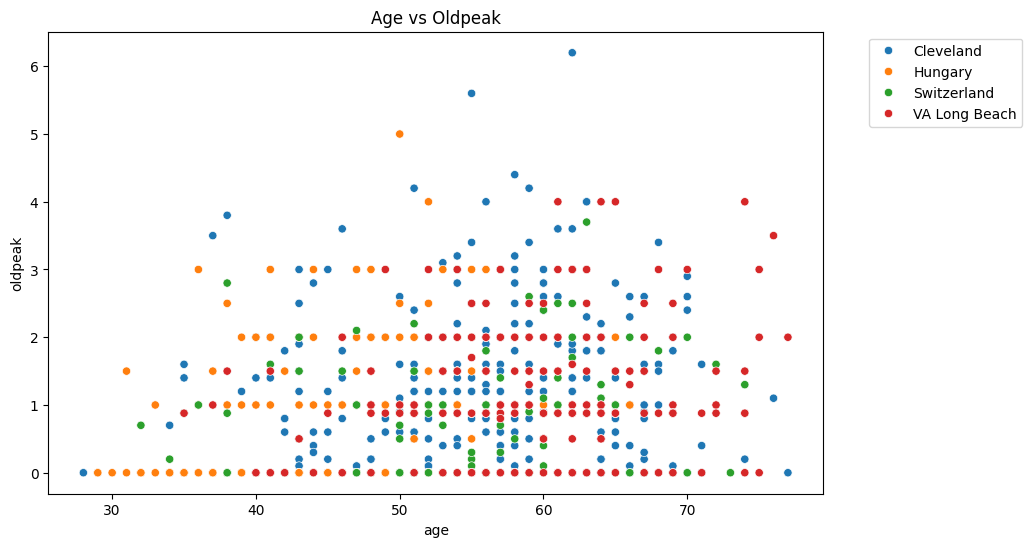

In [317]:
# is there any relationship of oldpeak with age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='oldpeak', hue='dataset')
# keep the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Age vs Oldpeak')
plt.show()

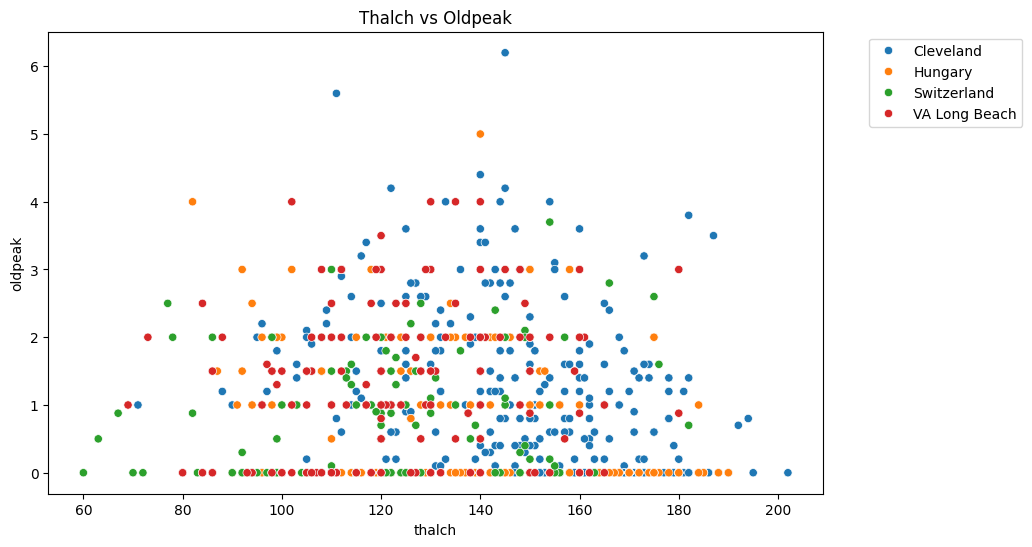

In [318]:
# is there any relationship of oldpeak with thalch
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='thalch', y='oldpeak', hue='dataset')
# keep the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Thalch vs Oldpeak')
plt.show()

#### slope column

In [319]:
df['slope'].value_counts()

slope
flat           563
upsloping      279
downsloping     65
Name: count, dtype: int64

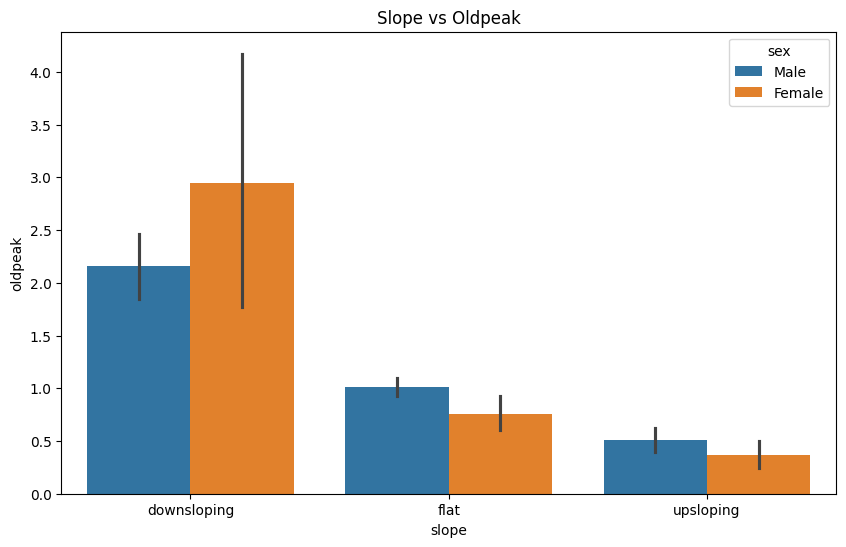

In [320]:
# plot for am categorical column with 3 values and an numeric column
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='slope', y='oldpeak', hue = 'sex')
plt.title('Slope vs Oldpeak')
plt.show()

#### ca column

The ca column represents the number of major blood vessels (ranging from 0 to 3) that were observed using fluoroscopy. 
Possible Values of ca:
ca Value	Meaning
> 0	- No major vessels were visible (high chance of blockage or narrowing) \
> 1	- 1 major vessel was visible \
> 2	- 2 major vessels were visible \
> 3	- 3 major vessels were visible (better blood flow, lower risk)

In [321]:
df['ca'].value_counts()

ca
0.676375    599
0.000000    181
1.000000     67
2.000000     40
3.000000     20
Name: count, dtype: int64

In [322]:
df[df['ca'] > 0].value_counts().sum()

726

In [323]:
df.shape

(907, 16)

* Maximum heart disease patients face blockage of heart vessels.
* There are only 181 out of 907 patients who did not faced any blockage of heart vessels.

In [324]:
# gender with more vessels blocked
df[df['ca'] > 0]['sex'].value_counts()

sex
Male      597
Female    129
Name: count, dtype: int64

In [325]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### thal column

The thal column represents Thalassemia results from a heart stress test, indicating how blood flows through the heart. It has three possible values:

thal Value Meaning
- (Normal) : Normal blood flow; no defects detected
- (Fixed Defect) : A permanent heart defect, indicating past heart damage (e.g., from a heart attack)
- (Reversible Defect) : A temporary defect, suggesting reduced blood flow that may improve with treatment

In [326]:
df['thal'].value_counts()

thal
reversable defect    507
normal               334
fixed defect          66
Name: count, dtype: int64

In [327]:
# thal normal with respect to gender
df[df['thal'] == 'normal']['sex'].value_counts()

sex
Male      183
Female    151
Name: count, dtype: int64

In [328]:
# thal normal with respect to gender
df[df['thal'] == 'reversable defect']['sex'].value_counts()

sex
Male      468
Female     39
Name: count, dtype: int64

In [329]:
# thal normal with respect to gender
df[df['thal'] == 'fixed defect']['sex'].value_counts()

sex
Male      62
Female     4
Name: count, dtype: int64

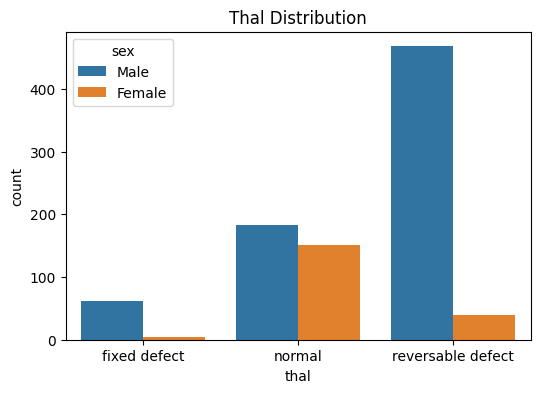

In [330]:
# gender wise distribution of thal column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='thal', hue='sex')
plt.title('Thal Distribution')
plt.show()

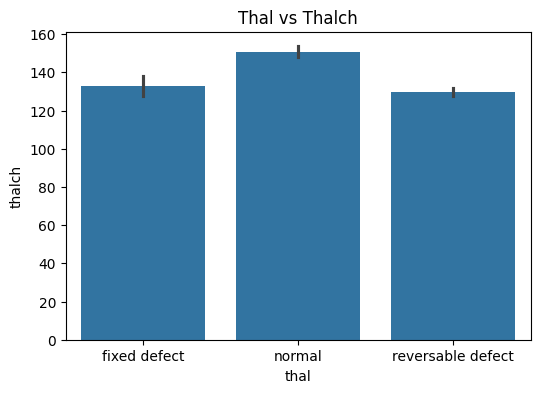

In [331]:
# scatter plot of thalch with respect to thal
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='thal', y='thalch')
plt.title('Thal vs Thalch')
plt.show()

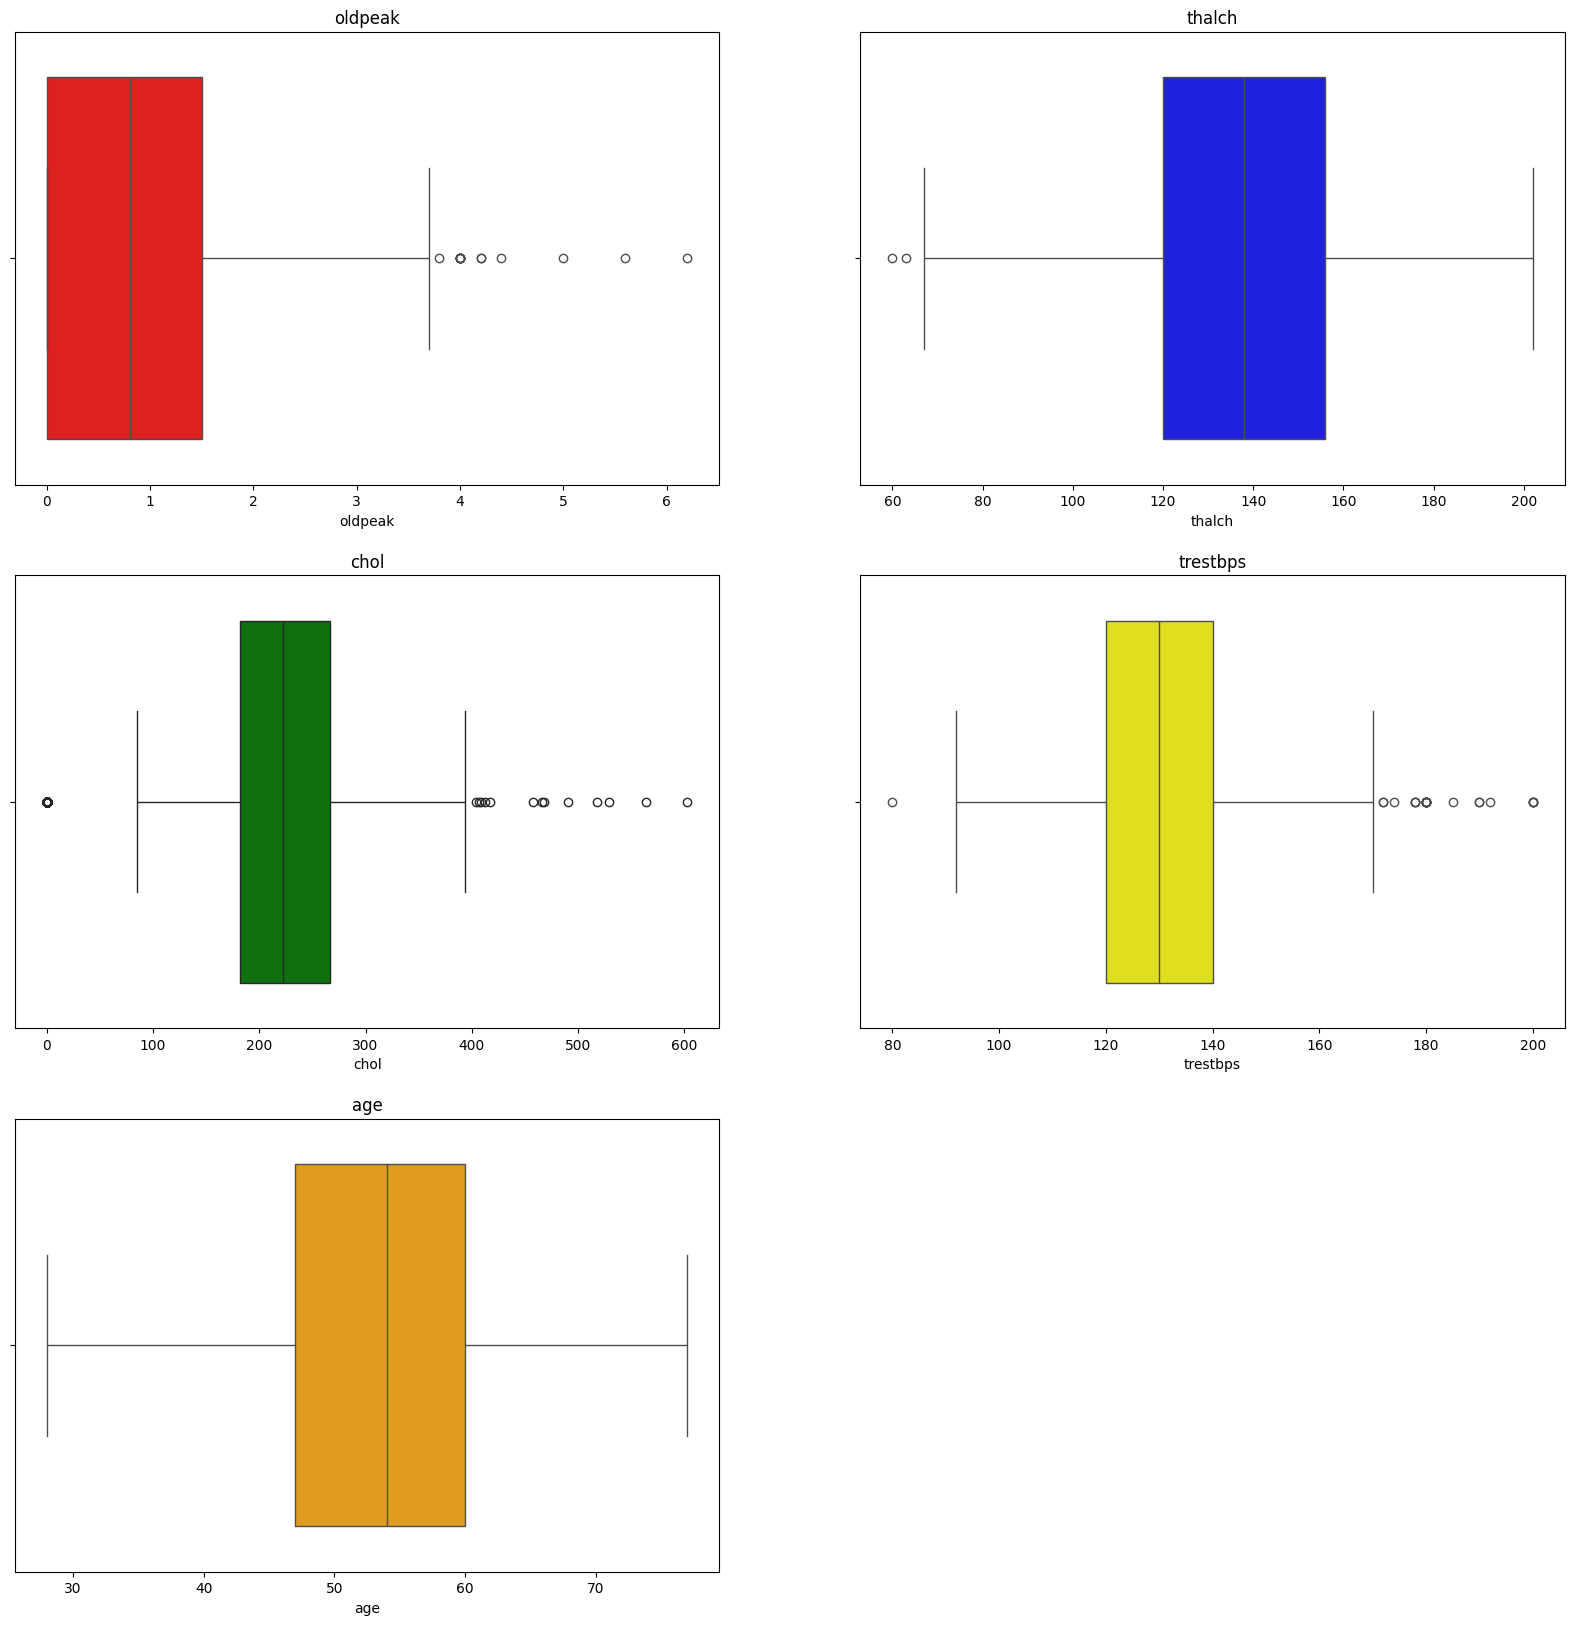

In [332]:
# let's have a eye on outliers

plt.figure(figsize=(20,20))

colors = ['red', 'blue', 'green', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

#### num column

In [333]:
df['num'].value_counts()

num
0    408
1    259
2    106
3    106
4     28
Name: count, dtype: int64

The Target column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are [0,1,2,3,4], which states that there are 5 types of heart diseases.

* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease`
* `3 = severe heart disease`
* `4 = critical heart disease`

In [334]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [335]:
# drop 'dataset', 'fbs', 'exang', 'oldpeak', 'ca' column

df.drop(['dataset', 'fbs', 'exang', 'oldpeak', 'ca'], axis=1, inplace=True)

---
<span style="color: yellow; font-weight: bold; font-size: 250%;">Machine Learning</span>

---

In [336]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode the categorical columns in X by using separate Label_encoder for each column for reverse transformation
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here are the models that I will use to predict the heart disease. These models are classifiers for multi class classification.
- Logistic Regression
- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- XGBoost
- Adaboost
- gradientBoosting
- lightGBM

In [337]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

# Define models and their hyperparameter grids
param_grids = {
    'LogisticRegression': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'lbfgs']
    },
    'KNeighborsClassifier': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'GaussianNB': {},  # No hyperparameters to tune
    # 'SVC': {
    #     'model__C': [0.1, 1, 10, 100],
    #     'model__kernel': ['linear', 'rbf']
    # },
    'DecisionTreeClassifier': {
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20]
    },
    'AdaBoostClassifier': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 1]
    },
    'GradientBoostingClassifier': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'LGBMClassifier': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'XGBClassifier': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }
}

models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    # 'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'XGBClassifier': XGBClassifier()
}

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate performance
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ('to_dense', FunctionTransformer(lambda x: x.values, accept_sparse=True)),
        ('model', model)
    ])

    # Use RandomizedSearchCV for hyperparameter tuning
    param_grid = param_grids.get(name, {})  # Get hyperparameters if available
    if param_grid:
        search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_pipeline = search.best_estimator_
    else:
        best_pipeline = pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = best_pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print performance
    print(f"Model: {name}")
    print("Best Hyperparameters:", search.best_params_ if param_grid else "Default used")
    print("Test Accuracy:", accuracy)
    print()

    # Check if this is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_pipeline

# Retrieve the best model
print("The Best model is:", best_model)

Tuning hyperparameters for LogisticRegression...
Model: LogisticRegression
Best Hyperparameters: {'model__solver': 'liblinear', 'model__C': 0.1}
Test Accuracy: 0.5421245421245421

Tuning hyperparameters for KNeighborsClassifier...
Model: KNeighborsClassifier
Best Hyperparameters: {'model__weights': 'uniform', 'model__n_neighbors': 7}
Test Accuracy: 0.6190476190476191

Tuning hyperparameters for GaussianNB...
Model: GaussianNB
Best Hyperparameters: Default used
Test Accuracy: 0.5384615384615384

Tuning hyperparameters for DecisionTreeClassifier...
Model: DecisionTreeClassifier
Best Hyperparameters: {'model__min_samples_split': 10, 'model__max_depth': 5}
Test Accuracy: 0.6373626373626373

Tuning hyperparameters for RandomForestClassifier...
Model: RandomForestClassifier
Best Hyperparameters: {'model__n_estimators': 200, 'model__max_depth': 10}
Test Accuracy: 0.6373626373626373

Tuning hyperparameters for AdaBoostClassifier...
Model: AdaBoostClassifier
Best Hyperparameters: {'model__n_est

<span style="color: yellow; font-weight: bold; font-size: 250%;">Outputs</span>

1. The minimum age of getting heart disease is 28 years.
2. There are 603 out of 920 (65%) patients with heart disease who are older than 50 years. 
3. The maximum number of patients with heart disease are between 40 to 65 years old.
4. We have highest number of patients from Cleveland (304) and lowest from Switzerland (123).
    * The highest number of male heart patients are from Hungary (212) and the lowest are from Switzerland (113).
    * The highest number of female heart patients are from Cleveland (97) and the lowest are from VA long beach (6).
5. The mean, median and mode of the dataset is approximately same with a little bit of difference.
6. The chest pain type 4 (asymptomatic) is the most common type of chest pain in heart patients and the chest pain type 1 (typical angina) is the least common type of chest pain in heart patients.
7. The chest pain is more common among the patients of age 48-55 years.
8. The minimum trestbps value is 0, which seems to be an outlier as the normal resting blood pressure is 120/80 mmHg. We will remove this outlier.
9. A total of 590 out of 919 (means 64.2%) of heart patients have higher than normal cholesterol levels. We can say that the cholesterol level is a major factor in heart disease.
10. In this dataset 61.2% male and 75.2% female heart patients have higher than normal cholesterol levels. It means the female patients are more prone to heart disease due to high cholesterol levels.
11. There is no any relationship between age and chol.
12. There is no any relationship of fbs with heart disease.
13. Almost 95% of Female heart disease patients have achieved the maximum heart rate more than normal. Similarly, 89% of the Male heart disease patients have achieved the maximum heart rate more than normal. 